In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get the Dataset

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [6]:
X_label = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [7]:
data['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

In [8]:
Y_label = data['class']

In [9]:
X = X_label
Y = Y_label

### Distribution of the classes

<AxesSubplot:xlabel='Time', ylabel='Amount'>

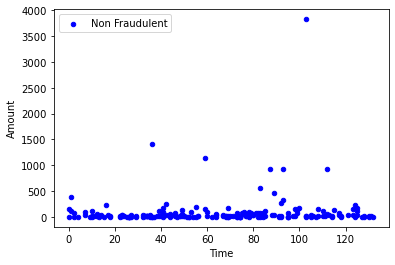

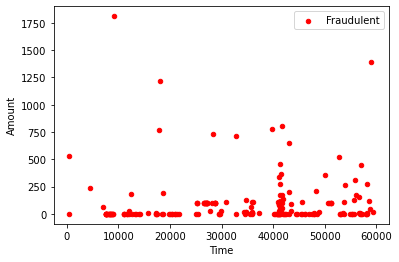

In [10]:
non_fraudulent_data =  data[data['class']==0][0:200]
fraudulent_data =  data[data['class']==1][0:200]

axes = non_fraudulent_data.plot(kind='scatter',x= 'Time', y='Amount', color='blue', label ='Non Fraudulent')
fraudulent_data.plot(kind='scatter',x= 'Time', y='Amount', color='red', label ='Fraudulent')

<AxesSubplot:xlabel='Time', ylabel='Amount'>

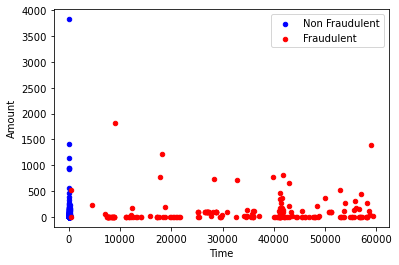

In [11]:
non_fraudulent_data =  data[data['class']==0][0:200]
fraudulent_data =  data[data['class']==1][0:200]

axes = non_fraudulent_data.plot(kind='scatter',x= 'Time', y='Amount', color='blue', label ='Non Fraudulent')
fraudulent_data.plot(kind='scatter',x= 'Time', y='Amount', color='red', label ='Fraudulent', ax= axes)

C:\Users\User2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Non fraudulent vs Fraudulent')

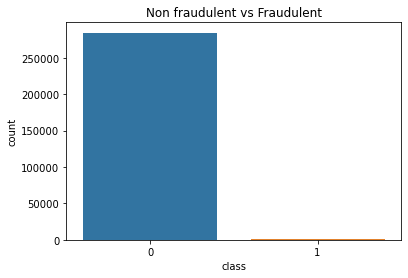

In [12]:
import seaborn as sns
sns.countplot(data['class'])
plt.title('Non fraudulent vs Fraudulent')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

In [15]:
X_train.shape,X_test.shape, Y_train.shape,Y_test.shape

((199364, 29), (85443, 29), (199364,), (85443,))

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [17]:
pred = knn.predict(X_test)

### Predictions and Evaluations
##### Let's evaluate our KNN model

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(Y_test, pred))

[[85290     9]
 [   54    90]]


In [20]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.91      0.62      0.74       144

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



### Ensemble Method 1 - EasyEnsembleClassi

In [22]:
#!pip install imblearn
#import imblearn
from collections import Counter

In [23]:
#scatter plot by class Label
#import matplotlib.pyplot as plt
#plt.figure(figsize= (18,10))
#counter =Counter(Y)
#for label, _ in counter.items():
#    row_ix = np.where(Y==label)[0]
 #   plt.scatter(X.loc[row_ix, 

In [24]:
# We can use confusion_matrix, f1_score and accuracy_score to test our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [25]:
print(f1_score(Y_test, pred))

0.7407407407407406


In [26]:
print(accuracy_score(Y_test, pred))

0.9992626663389628


In [27]:
print(precision_score(Y_test, pred))

0.9090909090909091
